In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
# import os

In [161]:
path = Path("data.csv").absolute()
print(path)

C:\Users\avrod\Baumana\SEM_4\Algorithms\Labs\lab_04\venv\data.csv


In [162]:
df = pd.read_csv(filepath_or_buffer=path, sep=' ')
headers = df.columns.to_list()
x_values = df['x']
y_values = df['y']
p_values = df['p']

In [163]:
def phi(x, k) -> float:
    return x ** k

In [164]:
def Integration(x : list, u : list) -> float:
    N = len(x) - 1
    result = 0.0
    for i in range(1, N):
        for k in range(1, N):
            h = x[i] - x[i - 1] 
            result += u[i] - u[i - 1] / 2 * h 
    return result

 1


In [145]:
def Approximation(x : list, u : list, K : int, a : list) -> float :       
    A = np.zeros((K + 1, K + 1)); B = np.zeros((K + 1, 1))
    for m in range(K + 1):
        for k in range(K + 1):
            A[m, k] = Integration(x, phi(x, m) * phi(x, k))
        B[m, 0] = Integration(x, phi(x, m) * u)
    C = np.linalg.solve(A, B)
    result = 0.0
    for i in range(K + 1):
        result += C[i,0] * phi(a, i)
    return result

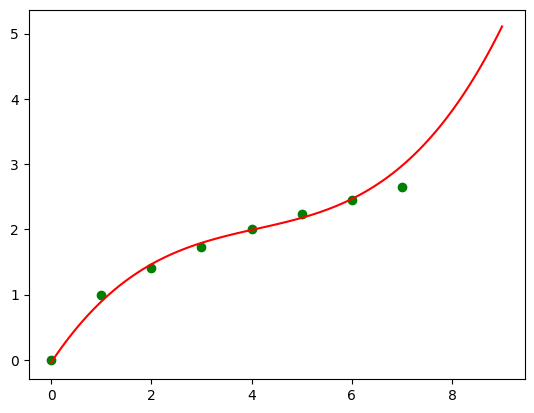

In [159]:
# K = int(input())
K = 3
x_approx = np.linspace(0,9,100)
u = Approximation(x_values, y_values, K, x_approx) 

# plt.xlim([0,10]);
# plt.ylim([0,10]);
# plt.axes().set_aspect(2)
plt.plot(x_values, y_values, 'go')
plt.plot(x_approx, u, '-r')
# plt.show()